In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")
sns.set_context("talk")

In [11]:
df1 = pd.read_csv("ReportDrugStatus.csv")
df2 = pd.read_csv("ReportInterventionPopAvg.csv")

In [12]:
df1

,Time,NodeID,IndividualID,Gender,AgeYears,Infected,Infectiousness,DrugName,CurrentEfficacy,NumRemainingDoses
0,1,1,2,F,10.0027,0,0.000000,Piperaquine,0.478960,2
1,1,1,3,F,10.0027,0,0.000000,Piperaquine,0.478960,2
2,1,1,4,F,10.0027,1,0.000000,Piperaquine,0.108004,2
3,1,1,5,M,10.0027,0,0.000000,Piperaquine,0.478960,2
4,1,1,6,M,10.0027,0,0.000000,Piperaquine,0.478960,2
...,...,...,...,...,...,...,...,...,...,...
364301,365,1,991,F,11.0000,1,0.461237,Piperaquine,0.000041,0
364302,365,1,992,F,11.0000,1,0.000140,Piperaquine,0.000041,0
364303,365,1,993,M,11.0000,1,0.008129,Piperaquine,0.000041,0
364304,365,1,994,F,11.0000,1,0.562196,Piperaquine,0.000041,0


In [13]:
df2

,Time,NodeID,InterventionName,FractionHas,AvgEfficacy-Attracting,AvgEfficacy-Repelling,AvgEfficacy-Blocking,AvgEfficacy-Killing,AvgEfficacy-Usage,AvgEfficacy-AcquisitionBlocking,AvgEfficacy-TransmissionBlocking,AvgEfficacy-MortalityBlocking,DrugConcentration
0,1,1,AntimalarialDrug,1.0,0,0,0,0,0,0,0,0,0.560364
1,2,1,AntimalarialDrug,1.0,0,0,0,0,0,0,0,0,2.673800
2,3,1,AntimalarialDrug,1.0,0,0,0,0,0,0,0,0,4.471930
3,4,1,AntimalarialDrug,1.0,0,0,0,0,0,0,0,0,1.378070
4,5,1,AntimalarialDrug,1.0,0,0,0,0,0,0,0,0,1.336550
...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,361,1,AntimalarialDrug,1.0,0,0,0,0,0,0,0,0,0.000226
361,362,1,AntimalarialDrug,1.0,0,0,0,0,0,0,0,0,0.000221
362,363,1,AntimalarialDrug,1.0,0,0,0,0,0,0,0,0,0.000216
363,364,1,AntimalarialDrug,1.0,0,0,0,0,0,0,0,0,0.000211


Text(0, 0.5, 'CurrentEfficacy')

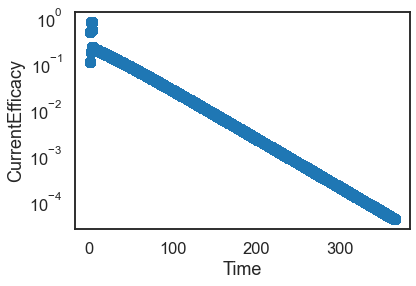

In [10]:
plt.scatter(df["Time"], df["CurrentEfficacy"])
# plt.xlim([0,100])
plt.yscale("log")
plt.xlabel("Time")
plt.ylabel("CurrentEfficacy")

Text(0, 0.5, 'CurrentEfficacy')

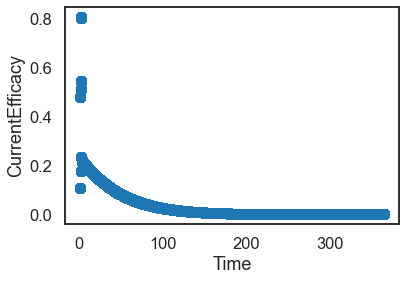

In [9]:
plt.scatter(df["Time"], df["CurrentEfficacy"])
# plt.xlim([0,100])
# plt.yscale("log")
plt.xlabel("Time")
plt.ylabel("CurrentEfficacy")

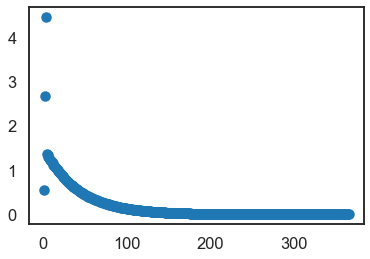

In [14]:
plt.scatter(df2["Time"], df2["DrugConcentration"])

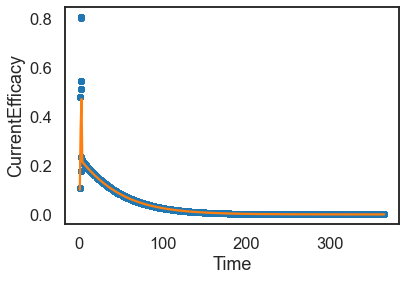

In [23]:
plt.scatter(df["Time"], df["CurrentEfficacy"], marker='.')
plt.xlabel("Time")
plt.ylabel("CurrentEfficacy")

# plt.plot(df2["Time"], df2["DrugConcentration"])
c50 = 5
plt.plot(df2["Time"], df2["DrugConcentration"]/(df2["DrugConcentration"]+c50), c="C1", zorder=5)

In [47]:
df_drug_params = pd.read_csv("malaria_drug_params.csv")
def get_drug_params(drug):
    df_drug = df_drug_params[df_drug_params["Name"]==drug].reset_index(drop=True)
    return df_drug.iloc[0].to_dict()

def pkpd_drug_concentration(t):
    drug_params = get_drug_params("Piperaquine")
    cmax = drug_params["Drug_Cmax"]
    A = drug_params["Drug_Decay_T1"]
    B = drug_params["Drug_Decay_T2"]
    V = drug_params["Drug_Vd"]
    
    # c = cmax * (np.exp(-A*t) + V*np.exp(-B*t))
    c = cmax * (np.exp(-t/A) + np.exp(-t/B)/V)
    return c

In [48]:
f = np.vectorize(pkpd_drug_concentration)

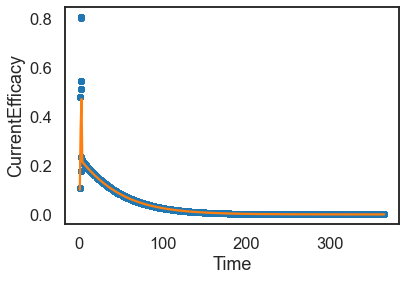

In [49]:
plt.scatter(df["Time"], df["CurrentEfficacy"], marker='.')
plt.xlabel("Time")
plt.ylabel("CurrentEfficacy")

# plt.plot(df2["Time"], df2["DrugConcentration"])
c50 = 5
plt.plot(df2["Time"], df2["DrugConcentration"]/(df2["DrugConcentration"]+c50), c="C1", zorder=5)


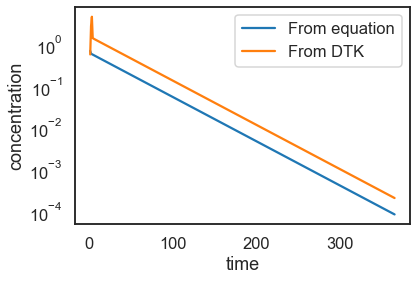

In [50]:

t = np.linspace(1,365,365)
plt.plot(t, f(t), label="From equation")

plt.plot(df2["Time"], df2["DrugConcentration"], c="C1", zorder=5, label="From DTK")
plt.yscale("log")

plt.xlabel("time")
plt.ylabel("concentration")
plt.legend()

In [51]:
np.mean(f(t)/df2["DrugConcentration"])

0.40643112733420095

In [39]:
df_drug_params

,Name,PKPD_Model,Drug_Cmax,Drug_Decay_T1,Drug_Decay_T2,Drug_Vd,Drug_PKPD_C50,Drug_Fulltreatment_Doses,Drug_Dose_Interval,Drug_Gametocyte02_Killrate,Drug_Gametocyte34_Killrate,Drug_GametocyteM_Killrate,Drug_Hepatocyte_Killrate,Max_Drug_IRBC_Kill,Drug_Adherence_Rate,Bodyweight_Exponent,Upper_Age_In_Years,Fraction_Of_Adult_Dose
0,Artemether,CONCENTRATION_VERSUS_TIME,114.0,0.120,0.120,1.00,0.60,6,0.5,2.5,1.5,0.7,0.0,8.90000,1,1.00,"[3,6,10]","[0.25,0.5,0.75]"
1,Lumefantrine,CONCENTRATION_VERSUS_TIME,1017.0,1.300,2.000,1.20,280.00,6,0.5,2.4,0.0,0.0,0.0,4.80000,1,0.35,"[3,6,10]","[0.25,0.5,0.75]"
2,DHA,CONCENTRATION_VERSUS_TIME,200.0,0.120,0.120,1.00,0.60,3,1.0,2.5,1.5,0.7,0.0,9.20000,1,1.00,"[.83,2.83,5.25,7.33,9.42]","[0.375,0.5,0.625,0.75,0.875]"
3,Piperaquine,CONCENTRATION_VERSUS_TIME,30.0,0.170,41.000,49.00,5.00,3,1.0,2.3,0.0,0.0,0.0,4.60000,1,0.00,"[.83,2.83,5.25,7.33,9.42]","[0.375,0.5,0.625,0.75,0.875]"
4,Primaquine,CONCENTRATION_VERSUS_TIME,75.0,0.360,0.360,1.00,15.00,1,1.0,2.0,5.0,50.0,0.1,0.00000,1,1.00,"[5,9,14]","[.17,.33,.67]"
5,Chloroquine,CONCENTRATION_VERSUS_TIME,150.0,8.900,244.000,3.90,150.00,3,1.0,0.0,0.0,0.0,0.0,4.80000,1,1.00,"[5,9,14]","[.17,.33,.67]"
6,Artesunate,CONCENTRATION_VERSUS_TIME,200.0,0.120,0.120,1.00,0.03,3,1.0,2.5,1.5,0.7,0.0,4.20000,1,1.00,"[2,5]","[0.167,0.33]"
7,Sulfadoxine,CONCENTRATION_VERSUS_TIME,105.8,8.550,8.550,1.00,0.20,1,1.0,0.0,0.0,0.0,0.0,0.50600,1,1.00,"[2,5]","[0.167,0.33]"
8,Pyrimethamine,CONCENTRATION_VERSUS_TIME,354.1,5.411,5.411,1.00,2.00,1,1.0,0.0,0.0,0.0,0.0,0.60000,1,1.00,"[2,5]","[0.167,0.33]"
9,Amodiaquine,CONCENTRATION_VERSUS_TIME,1185.0,0.120,6.250,2.51,35.50,3,1.0,0.0,0.0,0.0,0.0,0.67089,1,1.00,"[1,5]","[0.22,0.44]"


In [46]:
30*(np.exp(-10/0.17)+np.exp(-10/41)/49)

0.47973310763855187